In [451]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [602]:
import warnings
warnings.filterwarnings('ignore')

In [603]:
%matplotlib inline

In [661]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage.filters import gaussian_filter
import statsmodels.formula.api as sm
sns.set_palette(sns.color_palette('hot'))
sns.set_style('darkgrid')
sns.set_context('paper')

In [680]:
hour = 10

In [681]:
p_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/pickled/'
l_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/light_filt/'
file = p_loc+str(hour)+'all_data.pkl'
light_f = l_loc+str(hour)+'aw_light.npy'

In [682]:
dp = pd.read_pickle(file)
light = gaussian_filter(np.load(light_f).astype('int'), sigma=7)

In [679]:
print(light.astype(int))

[[217 217 217 ... 198 199 199]
 [217 217 217 ... 199 199 199]
 [217 217 217 ... 199 199 199]
 ...
 [385 385 386 ... 280 280 280]
 [383 384 385 ... 279 279 279]
 [383 383 384 ... 279 279 279]]


                            OLS Regression Results                            
Dep. Variable:             raw_motion   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     392.4
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.89e-70
Time:                        01:11:54   Log-Likelihood:                 4606.7
No. Observations:                 745   AIC:                            -9209.
Df Residuals:                     743   BIC:                            -9200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0011      0.000     -7.252      0.0

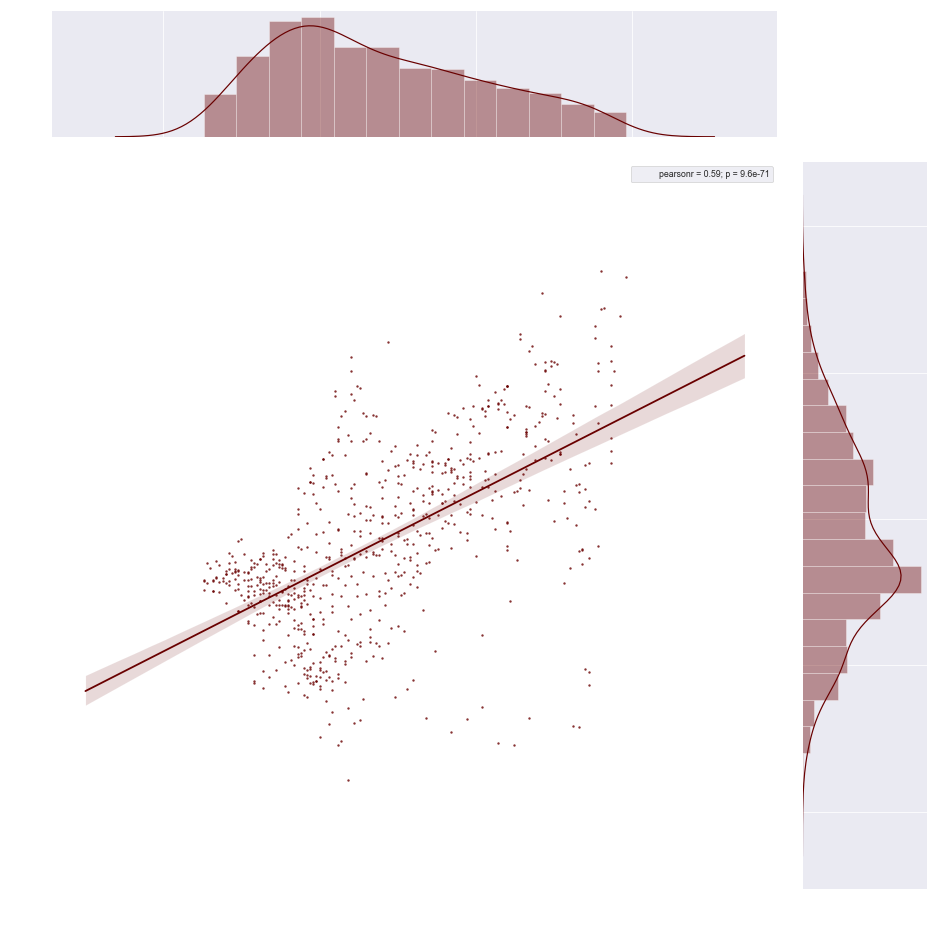

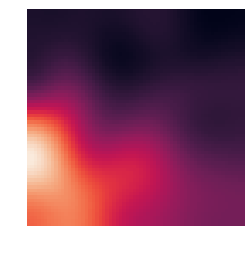

In [675]:
# This is a stats summary
results = sm.ols('raw_motion ~ light', dp).fit()
print(results.summary())

# This is the first regression curve
sns.jointplot('light','raw_motion', data=dp, marker = '.', kind='reg', size=13, stat_func=stats.pearsonr)
plt.axis('off')
plt.show()

#This is the black and white image we're interested in
plt.imshow(light.astype(int))
plt.axis('off')
plt.show()

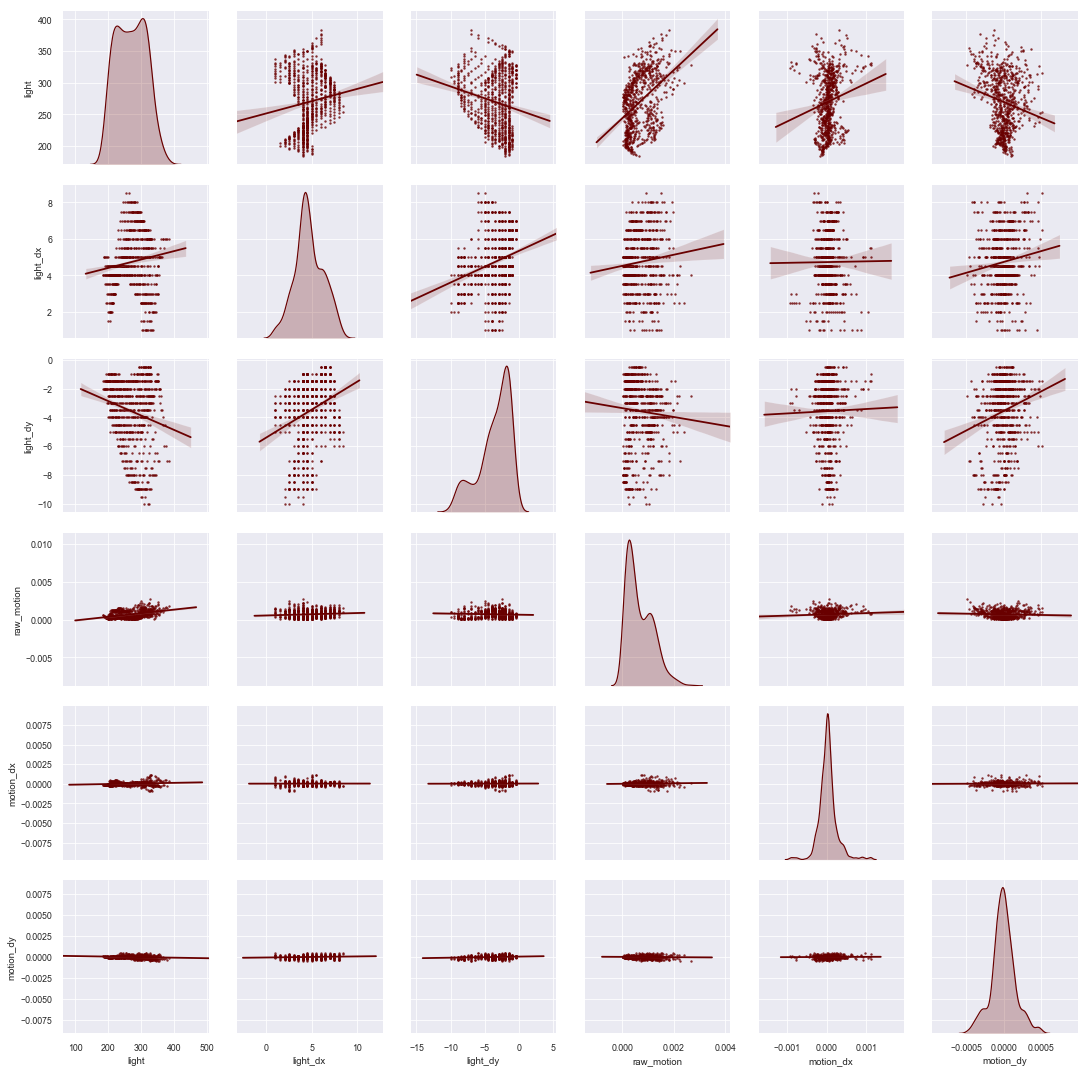

In [668]:
sns.pairplot(dp, diag_kind='kde', markers=".", kind='reg')

In [627]:
#import pandas_profiling
#pandas_profiling.ProfileReport(dp)

In [ ]:
print(dp.corr())
sns.heatmap(dp.corr().values)

In [ ]:
light_arr = np.reshape(dp['light'].values, (64,64))
sns.heatmap(light_arr)

In [ ]:
import math
math.pow(784,0.5)